In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['flower_type'] = iris_data.target
iris_df['flower_type'] = iris_df['flower_type'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})



In [3]:
# Check for missing values and duplicates
iris_df.isnull().sum()
iris_df.duplicated().sum()
iris_df = iris_df.drop_duplicates

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower_type        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


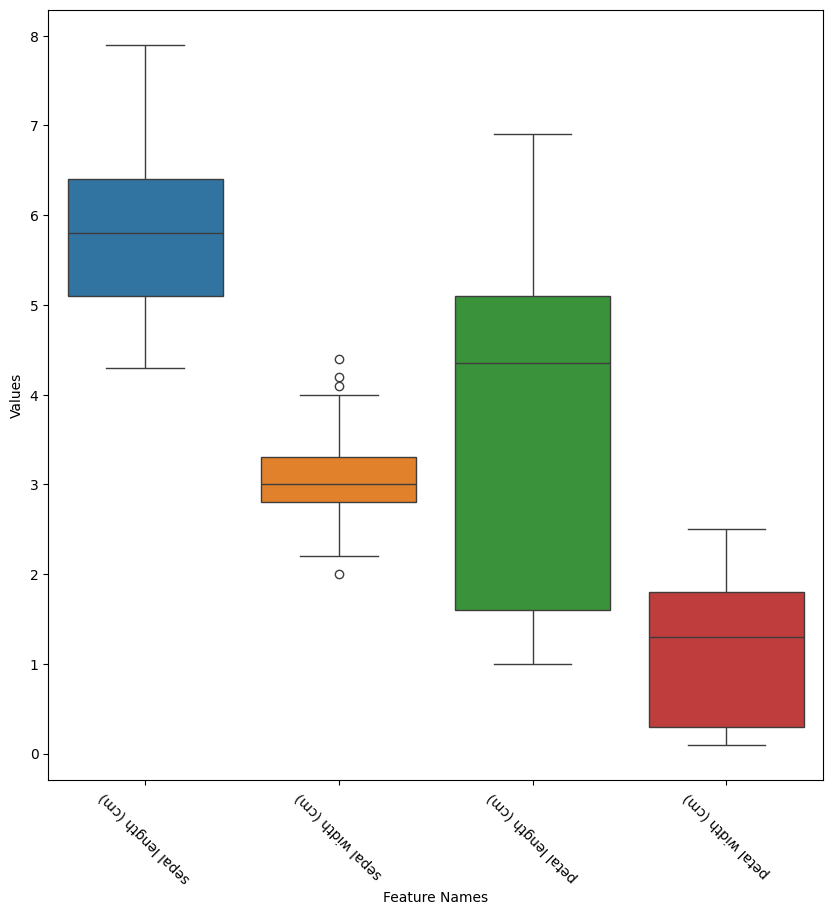

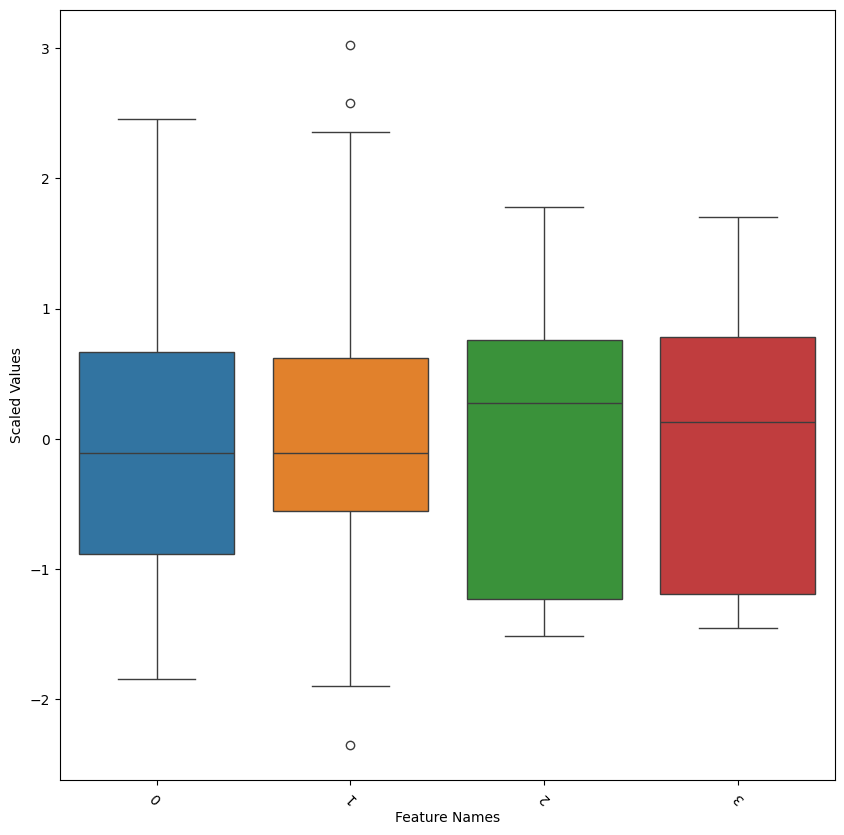

Accuracy Score: 0.9
Confusion Matrix: 
 [[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]


/Users/kshitizgupta/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


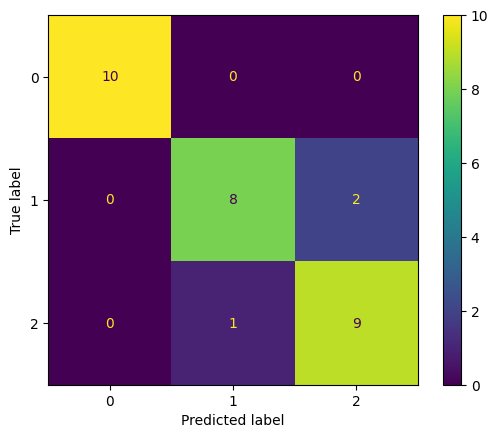

In [6]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['flower_type'] = iris_data.target
iris_df['flower_type'] = iris_df['flower_type'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display information
print(type(iris_df))
iris_df.info()
iris_df.describe()

# Splitting features and target
features = iris_df.drop('flower_type', axis=1)
target = iris_df['flower_type']

# Boxplot for feature distribution
plt.figure(figsize=(10, 10))
sns.boxplot(data=features, orient='v')
plt.xticks(rotation=135)
plt.xlabel('Feature Names')
plt.ylabel('Values')
plt.show()

# Import necessary libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Boxplot for scaled features
plt.figure(figsize=(10, 10))
sns.boxplot(data=X_train_scaled, orient='v')
plt.xticks(rotation=135)
plt.xlabel('Feature Names')
plt.ylabel('Scaled Values')
plt.show()

# Check class distribution
iris_df['flower_type'].value_counts(normalize=True)

# Import model and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Train the Logistic Regression model
model_lr = LogisticRegression(multi_class='ovr')
model_lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = model_lr.predict(X_test_scaled)

# Print evaluation metrics
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

# Save model using pickle
import pickle
pickle.dump(model_lr, open('yashika_iris_model.pkl', 'wb'))
